# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [1]:
# use these links to do so:
# importing the libraries

import pandas as pd
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score

In [2]:
# Load the data into dataframe
df = pd.read_csv('Churn.csv')

### Understanding the data

In [3]:
#displaying the dataset

df.head(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


In [4]:
# Show the number of rows and columns 

df.shape

(7043, 21)

In [5]:
# Show all of the columns 

df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# check for missing or na values

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# showing some statistics

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# Get customer churn counts 

df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Data Manipulation

In [9]:
# the percentage of customers that are leaving 

num_retained = df[df.Churn == 'No'].shape[0]
num_churned = df[df.Churn == 'Yes'].shape[0]

In [10]:
# percentage of customers that stayed 

print(num_retained / (num_retained + num_churned) * 100, '% of customers stayed with the company.')

73.4630129206304 % of customers stayed with the company.


In [11]:
# percentage of customers that left

print(num_churned / (num_retained + num_churned) * 100, '% of customers left the company.')

26.536987079369588 % of customers left the company.


In [12]:
# Remove unnecessary columns 

cleaned_df = df.drop('customerID', axis =1)

In [13]:
# convert all of the non numeric columns into numeric

# if a particular column from cleaned_df has datatype as number then continue,
# otherwise change that column to a number.

for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number:
        continue
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
    
    

<ipython-input-13-a0ee74cfa6eb>:7: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:


In [14]:
cleaned_df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [15]:
cleaned_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [16]:
# VIF (Variable Inflation Factors) starts usually at 1 and anywhere 
# exceeding 10 indicates high multicollinearity between the independent 
# variables.

# VIF determines the strength of the correlation of a variable 
# with a group of other independent variables in a dataset.


def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)
df2 = cleaned_df[['gender', 
                    'SeniorCitizen', 'Partner', 'Dependents',
                    'tenure', 'PhoneService',
                    'PaperlessBilling','MonthlyCharges',
                        'TotalCharges']]
calc_vif(df2)

,variables,VIF
0,gender,1.888095
1,SeniorCitizen,1.323192
2,Partner,2.814825
3,Dependents,1.911352
4,tenure,3.351906
5,PhoneService,6.378259
6,PaperlessBilling,2.758454
7,MonthlyCharges,8.016801
8,TotalCharges,4.077233


In [17]:
# We can see that all the above columns have low VIF value, 
# implies all the columns are not correlated to each other significantly.

### Data Visualization

C:\Users\my pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

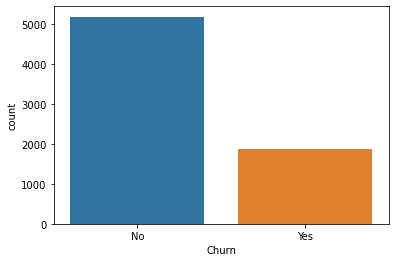

In [18]:
# visualize the count of customer churn

sns.countplot(df['Churn'])

<AxesSubplot:xlabel='gender', ylabel='count'>

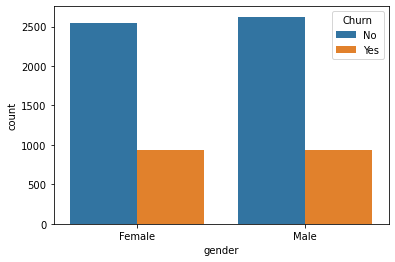

In [19]:
# visualize the churn count for both males and females 

sns.countplot(x='gender', hue= 'Churn', data = df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

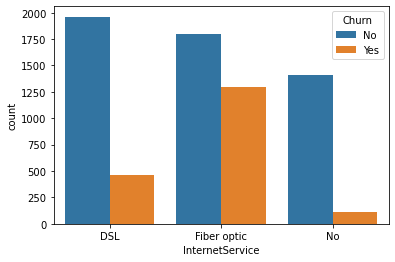

In [20]:
# visualize the churn count for the internet service

sns.countplot(x='InternetService', hue= 'Churn', data = df)

array([<AxesSubplot:title={'center':'tenure'}>,
       <AxesSubplot:title={'center':'MonthlyCharges'}>], dtype=object)

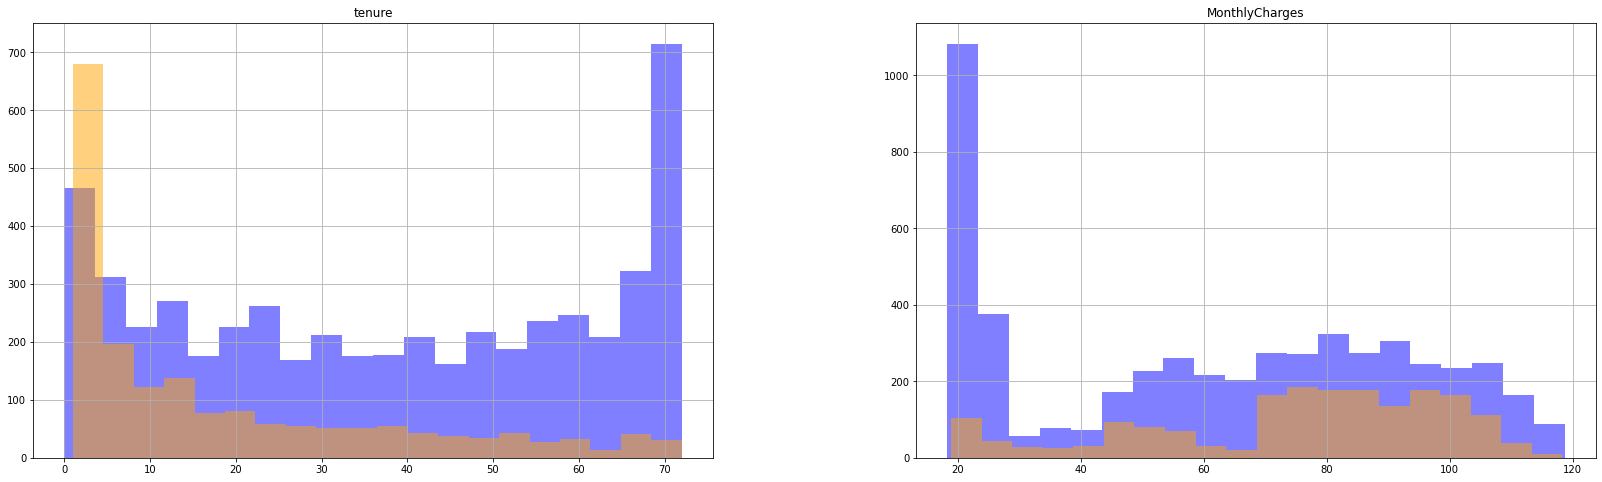

In [21]:
# 1,2 implies 1 row with two columns tenure and MonthlyCharges 
# All of the data from the dataframe where churn is no for the tenure and 
# MonthlyCharges columns with a transparency of 0.5(alpha).
# Similarly for churn equal to yes.

numerical_features = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1, 2, figsize=(28,8))
df[df.Churn=='No'][numerical_features].hist(bins=20, color='blue', alpha =0.5, ax =ax)
df[df.Churn=='Yes'][numerical_features].hist(bins=20, color='orange', alpha =0.5, ax =ax)


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

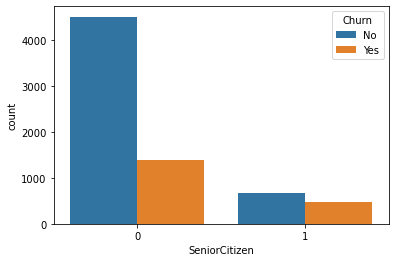

In [22]:
# visualize the churn count for the senior citizen

sns.countplot(x='SeniorCitizen', hue= 'Churn', data = df)

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

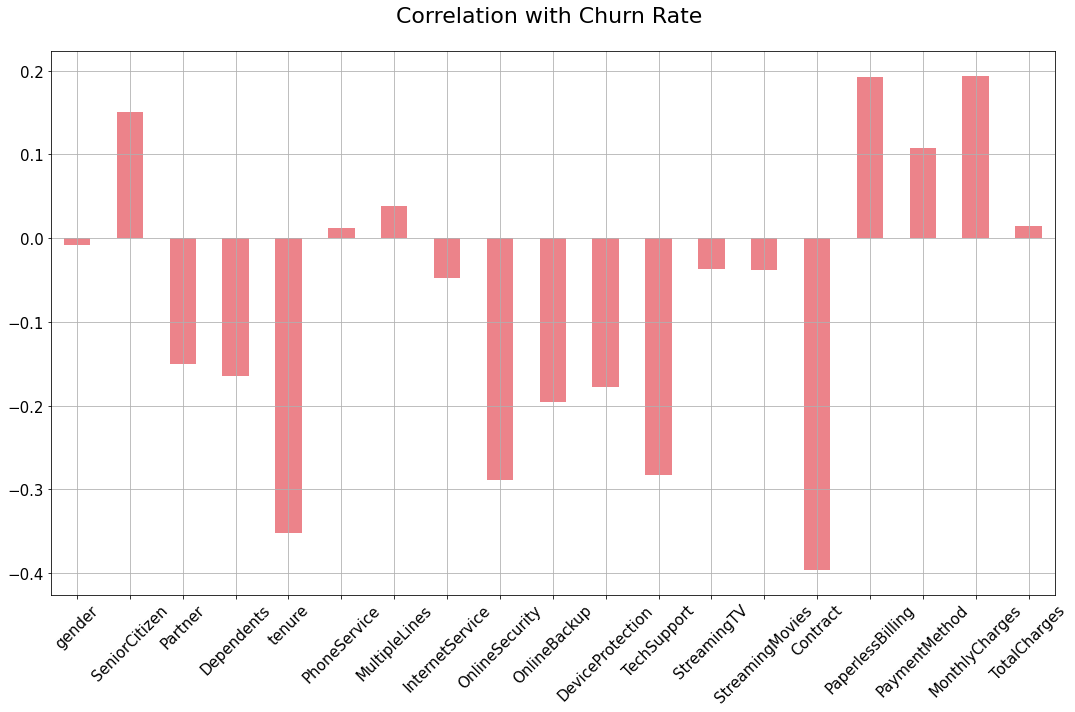

In [23]:
correlations = cleaned_df.corrwith(cleaned_df.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

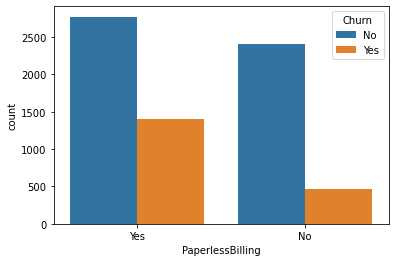

In [24]:
# visualize the churn count for the paperless billing

sns.countplot(x='PaperlessBilling', hue= 'Churn', data = df) 

<AxesSubplot:xlabel='Contract', ylabel='count'>

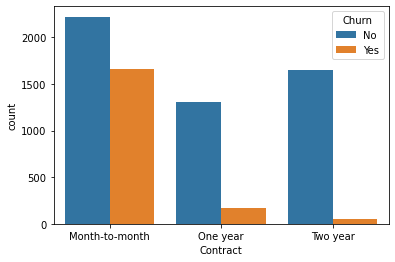

In [25]:
# visualize the churn count for the contract

sns.countplot(x='Contract', hue= 'Churn', data = df) 

In [26]:
# There are more customers that stayed with the company than there 
# are customers who left. 

# The number of customers who stayed with the company and who left 
# the company on the basis of gender is even. Implies gender will 
# not be considered for predicting the costomers who churned.

# The highest number of customers who did not churn have DSL 
# internet service.
 
# The highest count for customers that did churn have Fiber optic internet
# service.

# The ones who churned have a lower tenure(0 to 5 months) and the ones who stayed have a 
# higher tenure (68 to 72 months).

# Most of the customers that are staying have a monthly charges between 
# 18 to 24 units.

# The churn count is higher in the range of 70 to 100 units for 
# the monthly charges

# Most of the people in the dataset are younger people.

# The positive relation to churn means that having this type 
# of contract increases the probability of a customer to churn. 

# negative relation to the predicted variable means 
# that customers with this type of contract are very unlikely to churn.

# The highest number of people that stayed with the company have 
# paperless billing.

# Almost all the customers who have two year contract with the company stayed.

# Customers with a month-to-month contract have a 
# very high probability to churn.

### Implement Machine Learning Models

In [27]:
# scaling the data 
# X contains all the columns except the Churn column
# y contains the Churn column as target variable

X = cleaned_df.drop('Churn', axis=1)
Z = X.copy
y = cleaned_df['Churn']

X = StandardScaler().fit_transform(X) 

In [28]:
display(X)

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.16032292, -0.39860759],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.25962894, -0.94876238],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.36266036, -1.64188328],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.13968008],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  1.33486261,
         0.32033821, -0.31653445],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.47405205,
         1.35896134,  1.13801338]])

In [29]:
# spliting the data into 57% training and 43% testing

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.43, random_state =42)

In [30]:
# Creating the model1 

model1 = LogisticRegression()

# Training the model1

model1.fit(x_train, y_train)

LogisticRegression()

In [31]:
# creating predictions on the test data

predictions1 = model1.predict(x_test)

In [32]:
# checking the precision, recall and f1 score

# Precision is the ratio of correctly predicted positive 
# observations to the total predicted positive observations.
# Precision = TruePositives / (TruePositives + FalsePositives)

# Recall is the ratio of correctly predicted positive observations 
# to all the observations in actual class.
# Recall = TruePositives / (TruePositives + FalseNegatives)

# F1-Score is the weighted average of Precision and Recall.
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)

print(confusion_matrix(y_test,predictions1))
print(classification_report(y_test, predictions1))
print(accuracy_score(y_test, predictions1))

[[2002  218]
 [ 352  457]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      2220
           1       0.68      0.56      0.62       809

    accuracy                           0.81      3029
   macro avg       0.76      0.73      0.75      3029
weighted avg       0.80      0.81      0.81      3029

0.8118190822053483


In [33]:
# n_estimators is the number of trees to be used in the forest

# max_depth represents max number of levels in each decision tree

# random state controls both the randomness of the bootstrapping of the 
# samples used when building trees and the sampling of the 
# features to consider when looking for the best split at each node.


rf = RandomForestClassifier(n_estimators=100, max_depth=20,
                              random_state=42)
rf.fit(x_train, y_train) 
score = rf.score(x_train, y_train)
score2 = rf.score(x_test, y_test)
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.999
Test set accuracy:  0.786


In [34]:
y_pred = rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[1998  222]
 [ 426  383]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      2220
           1       0.63      0.47      0.54       809

    accuracy                           0.79      3029
   macro avg       0.73      0.69      0.70      3029
weighted avg       0.77      0.79      0.78      3029

0.7860680092439749


In [35]:
# The performance metrics are quite good for logistic regression for
# predicting customers 
# who dosen’t churn with precision, recall and F1 score values of 
# 0.85, 0.90,0.88. But model is not able to accurately 
# predict Athe customers who will churn with the corresponding 
# values of 0.68, 0.56, 0.62.
# Overall accuracy of the model is 81%.

In [36]:
# The performance metrics are quite good for random rorest classifier for
# predicting customers 
# who dosen’t churn with precision, recall and F1 score values of 
# 0.82, 0.90,0.86. But model is not able to accurately 
# predict Athe customers who will churn with the corresponding 
# values of 0.63, 0.47, 0.54.
# Overall accuracy of the model is 78.60%

### Model Evaluation

In [37]:
accuracies = cross_val_score(estimator = model1,
 X = x_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression Classifier Accuracy: 0.79 (+/- 0.02)


In [38]:
accuracies = cross_val_score(estimator = rf,
 X = x_train, y = y_train, cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.79 (+/- 0.04)


In [39]:
# Therefore, our k-fold Cross Validation results indicate that 
# we would have an accuracy anywhere between 77% to 81% for logistic regression
# and 75% to 83% for random forest while 
# running this model on any test set.

### Final Conclusions

In [40]:
# The overall accuracy of logistic regression is,81%, higher than 
# random forest's overall accuracy of 78%.

# The confusion matrix for logistic regression is predicting 2002 values 
# correctly for the customers wno remained with company and 457 values 
# correctly for the customers who left the company.

# The tenure and contract have negative relations with the churn and 
# paperlessbilling and monthly charges have positive relation with the churn.

# The customers nust be encouraged to use DSL internet service.

# The customers must be promoted to use paperlessbilling service.

# The customers must be encouraged to have higher tenure and twoyear contract
# with the company.

# And to check whether the above mentioned recomendations worked, we need 
# to update the input dataset and run the programm  again to see
# how people churned and how many people stayed. 